<a href="https://colab.research.google.com/github/bala-101/market_prediction_nifty_50/blob/main/predicting_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [ ]:
stock = yf.download('^NSEI',start = '2009-1-1',end='2024-8-12')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,3034.600098,3079.850098,3021.800049,3046.750000,3046.750000,0
2009-01-05,3058.750000,3131.949951,3056.449951,3121.449951,3121.449951,0
2009-01-06,3121.500000,3141.800049,3056.100098,3112.800049,3112.800049,0
2009-01-07,3112.800049,3147.199951,2888.199951,2920.399902,2920.399902,0
2009-01-09,2919.949951,2929.850098,2810.250000,2873.000000,2873.000000,0
...,...,...,...,...,...,...
2024-08-05,24302.849609,24350.050781,23893.699219,24055.599609,24055.599609,487000
2024-08-06,24189.849609,24382.599609,23960.400391,23992.550781,23992.550781,312300
2024-08-07,24289.400391,24337.699219,24184.900391,24297.500000,24297.500000,317600


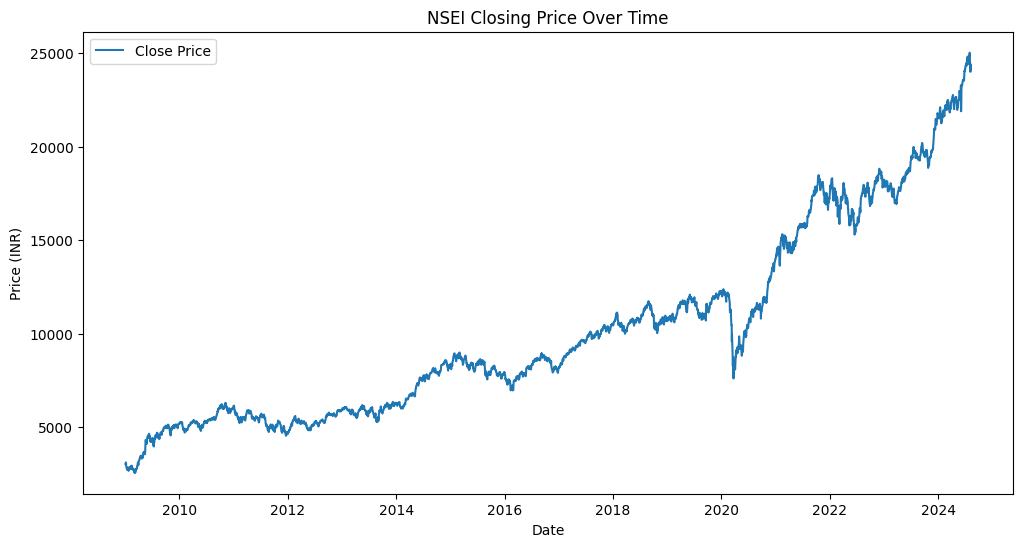

In [ ]:
# Plotting the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(stock['Close'], label='Close Price') # Use the 'stock' DataFrame you created
plt.title('NSEI Closing Price Over Time') # Change title to reflect the index you're using
plt.xlabel('Date')
plt.ylabel('Price (INR)') # Change y-axis label to reflect the currency
plt.legend()
plt.show()

In [ ]:
# Creating a 50-day and 200-day moving average
stock['50_MA'] = stock['Close'].rolling(window=50).mean()
stock['200_MA'] = stock['Close'].rolling(window=200).mean()

In [ ]:
# Shifting the 'Close' column to create the target variable
stock['Target'] = stock['Close'].shift(-1)

# Dropping rows with missing values (caused by shifting)
stock.dropna(inplace=True)

# Selecting the features (inputs) and target (output)
features = stock[['Close', '50_MA', '200_MA']]
target = stock['Target']

# Display the first few rows of features and target
print(features.head())
print(target.head())


                  Close        50_MA       200_MA
Date                                             
2009-10-30  4711.700195  4844.306016  3926.758499
2009-11-03  4563.899902  4847.826016  3934.344248
2009-11-04  4710.799805  4852.864014  3942.290997
2009-11-05  4765.549805  4860.293008  3950.554746
2009-11-06  4796.149902  4867.147002  3959.933496
Date
2009-10-30    4563.899902
2009-11-03    4710.799805
2009-11-04    4765.549805
2009-11-05    4796.149902
2009-11-06    4898.399902
Name: Target, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}")
print(f"Testing data: {X_test.shape}")


Training data: (2899, 3)
Testing data: (725, 3)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 75.2037517293797
Root Mean Squared Error: 112.46004327827855


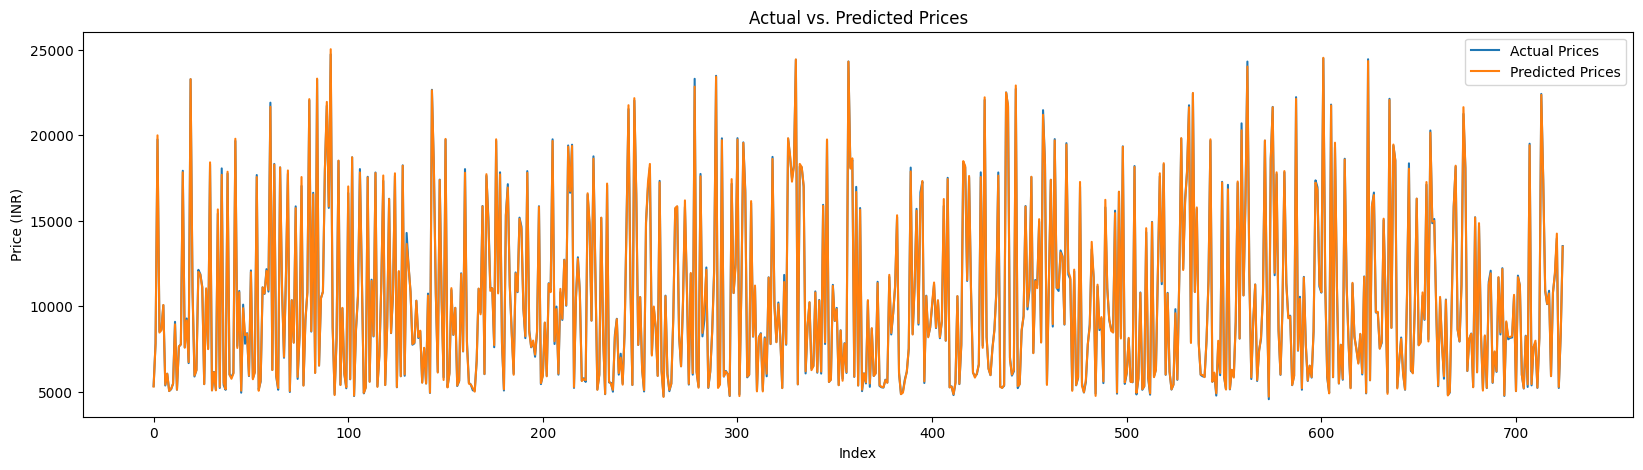

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

In [ ]:
def get_moving_averages(date):
  # Ensure the date is in the correct format
  date = pd.to_datetime(date)

  # Filter the DataFrame for dates up to the given date
  data_up_to_date = stocks.loc[:date]

  # Calculate the moving averages
  ma50 = data_up_to_date['Close'].rolling(window=50).mean().iloc[-1]
  ma200 = data_up_to_date['Close'].rolling(window=200).mean().iloc[-1]

  return ma50, ma200

# Get user input for the date
date_input = input("Enter the date (YYYY-MM-DD): ")

# Calculate and print the moving averages
ma50, ma200 = get_moving_averages(date_input)
print(f"50-day moving average on {date_input}: {ma50}")
print(f"200-day moving average on {date_input}: {ma200}")


Enter the date (YYYY-MM-DD): 2024-8-3
50-day moving average on 2024-8-3: 23840.16390625
200-day moving average on 2024-8-3: 21974.151201171873


In [ ]:
import numpy as np
def predict_price(close, ma50, ma200):

  input_data = np.array([[close, ma50, ma200]])
  prediction = model.predict(input_data)
  return prediction[0]

# Example usage:
close_price = float(input("Enter today's closing price: "))
ma50 = float(input("Enter today's 50-day moving average: "))
ma200 = float(input("Enter today's 200-day moving average: "))

predicted_price = predict_price(close_price, ma50, ma200)
print(f"Predicted closing price for tomorrow: {predicted_price}")


Enter today's closing price: 24297
Enter today's 50-day moving average: 23840.16390625
Enter today's 200-day moving average: 21974.151201171873
Predicted closing price for tomorrow: 24309.983759284412


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use a more complex model like Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [ ]:
def get_moving_averages(date):
  # Ensure the date is in the correct format
  date = pd.to_datetime(date)

  # Filter the DataFrame for dates up to the given date
  data_up_to_date = stock.loc[:date]

  # Calculate the moving averages
  ma50 = data_up_to_date['Close'].rolling(window=50).mean().iloc[-1]
  ma200 = data_up_to_date['Close'].rolling(window=200).mean().iloc[-1]

  return ma50, ma200

# Get user input for the date
date_input = input("Enter the date (YYYY-MM-DD): ")

# Calculate and print the moving averages
ma50, ma200 = get_moving_averages(date_input)
print(f"50-day moving average on {date_input}: {ma50}")
print(f"200-day moving average on {date_input}: {ma200}")
a = ma50
b = ma200

def predict_price(close, ma50, ma200):
  # Scale the input data using the same scaler used for training
  input_data = scaler.transform(np.array([[close, ma50, ma200]]))
  prediction = model.predict(input_data)
  return prediction[0]

close_price = float(input("Enter today's closing price: "))
ma50 = a
ma200 = b

predicted_price = predict_price(close_price, ma50, ma200)
print(f"Predicted closing price for tomorrow: {predicted_price}")

Enter the date (YYYY-MM-DD): 2024-05-13
50-day moving average on 2024-05-13: 22291.85
200-day moving average on 2024-05-13: 20837.158515625
Enter today's closing price: 22104.05
Predicted closing price for tomorrow: 24816.85025390625


In [ ]:
# Calculate the 50-day moving average
stock['50_MA'] = stock['Close'].rolling(window=50).mean()

# Calculate the 200-day moving average
stock['200_MA'] = stock['Close'].rolling(window=200).mean()

# Drop any rows with missing values
stock.dropna(inplace=True)


In [ ]:
# Shift the 'Close' column to get the next day's closing price as the target
stock['Target'] = stock['Close'].shift(-1)

# Drop the last row as it will have a NaN target
stock.dropna(inplace=True)

# Define the features and target
features = stock[['Close', '50_MA', '200_MA']]
target = stock['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the testing data
predictions = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 83.81657529510719
Root Mean Squared Error: 128.55415022707766


In [ ]:
# Specify the date you are interested in
specific_date = input("Enter the date (YYYY-MM-DD): ")

# Get the features for the specific date
specific_features = stock.loc[specific_date, ['Close', '50_MA', '200_MA']]

# Reshape for prediction (1 sample, 3 features)
specific_features = specific_features.values.reshape(1, -1)

# Make the prediction
predicted_price = model.predict(specific_features)

print(f"Predicted price for {specific_date}: {predicted_price[0]}")
print(f"50-day MA: {stock.loc[specific_date, '50_MA']}")
print(f"200-day MA: {stock.loc[specific_date, '200_MA']}")


Enter the date (YYYY-MM-DD): 2024-08-5
Predicted price for 2024-08-5: 24098.2359765625
50-day MA: 23861.922890625
200-day MA: 21996.867451171875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
